In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.applications.resnet import ResNet50
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
import matplotlib.image as mpimg

In [ ]:
df_labels = pd.read_csv('/datasets/faces/labels.csv')
#'/datasets/faces/final_files/'


In [ ]:
print(df_labels.head())

    file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17


(7591, 2)


(array([ 708., 1346., 2214., 1414.,  929.,  534.,  254.,  111.,   68.,
          13.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

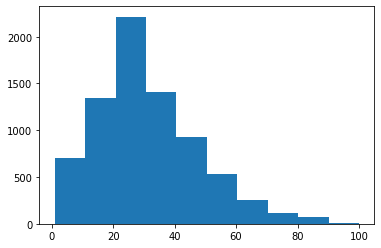

In [ ]:
print(df_labels.shape)
plt.hist(df_labels['real_age'])

In [ ]:
dir = '/datasets/faces/final_files/'

df_sample = df_labels.sample(n=15)
print(df_sample)

       file_name  real_age
2747  002747.jpg        49
2172  002172.jpg        28
3120  003120.jpg        46
3254  003254.jpg         1
791   000791.jpg        15
4762  004762.jpg        21
6151  006154.jpg        42
3269  003269.jpg        50
1961  001961.jpg        64
2911  002911.jpg        67
3688  003688.jpg        38
3019  003019.jpg        34
5837  005837.jpg        32
3481  003481.jpg        30
7334  007356.jpg         6


49
[[[199 205 169]
  [199 205 169]
  [199 205 171]
  ...
  [183 186 165]
  [178 181 160]
  [175 178 157]]

 [[199 205 169]
  [199 205 169]
  [199 205 171]
  ...
  [183 187 164]
  [178 182 159]
  [175 179 156]]

 [[199 205 171]
  [199 205 171]
  [200 206 172]
  ...
  [183 187 164]
  [178 182 159]
  [175 179 156]]

 ...

 [[154 161 153]
  [154 161 153]
  [154 162 151]
  ...
  [188 154  57]
  [188 154  56]
  [188 154  54]]

 [[154 161 153]
  [154 161 153]
  [154 161 153]
  ...
  [189 155  58]
  [189 155  57]
  [189 155  55]]

 [[153 160 152]
  [153 160 152]
  [152 159 151]
  ...
  [189 155  58]
  [189 155  57]
  [190 156  56]]]
(249, 248, 3)
<class 'PIL.Image.Image'>
RGB
(248, 249)


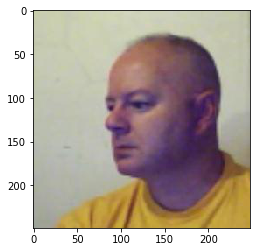

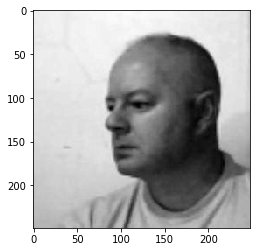

[============================]
28
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[160 134 101]
  [160 134 101]
  [159 133 100]
  ...
  [255 190 122]
  [254 182 110]
  [231 164  86]]

 [[156 133 102]
  [156 133 102]
  [156 133 102]
  ...
  [255 184 119]
  [255 191 121]
  [236 168  95]]

 [[151 130 101]
  [152 131 102]
  [152 131 102]
  ...
  [245 169 107]
  [255 193 127]
  [234 167  96]]]
(414, 414, 3)
<class 'PIL.Image.Image'>
RGB
(414, 414)


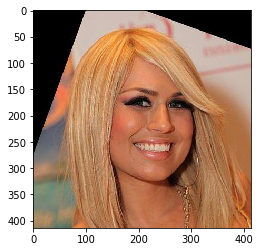

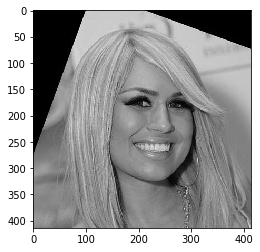

[============================]
46
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [64 48 87]
  [62 46 85]
  [61 45 84]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [63 47 86]
  [63 47 86]
  [62 46 85]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [62 46 83]
  [63 47 84]
  [64 48 85]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [64 54 81]
  [40 30 57]
  [60 50 77]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [65 55 82]
  [41 31 58]
  [28 18 45]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [67 57 84]
  [49 39 66]
  [16  6 33]]]
(214, 214, 3)
<class 'PIL.Image.Image'>
RGB
(214, 214)


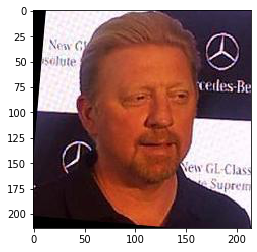

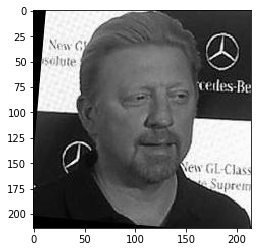

[============================]
1
[[[  0   5   3]
  [  0   6   3]
  [  0   1   0]
  ...
  [174 156 144]
  [173 155 145]
  [173 155 145]]

 [[  0   1   7]
  [  0   1   5]
  [  0   0   2]
  ...
  [172 154 142]
  [172 154 142]
  [173 155 145]]

 [[  2   4  19]
  [ 10  10  20]
  [  3   0   2]
  ...
  [170 153 137]
  [171 153 139]
  [174 156 144]]

 ...

 [[122  84  65]
  [127  89  70]
  [133  91  75]
  ...
  [110  54  41]
  [113  57  44]
  [116  58  44]]

 [[126  90  66]
  [131  93  72]
  [136  95  75]
  ...
  [109  57  43]
  [115  62  48]
  [107  54  40]]

 [[127  91  67]
  [131  93  70]
  [132  91  69]
  ...
  [120  71  57]
  [123  74  59]
  [109  60  45]]]
(152, 153, 3)
<class 'PIL.Image.Image'>
RGB
(153, 152)


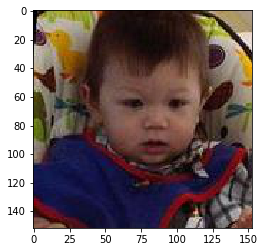

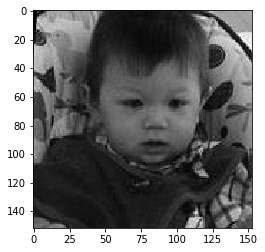

[============================]
15
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
(974, 1102, 3)
<class 'PIL.Image.Image'>
RGB
(1102, 974)


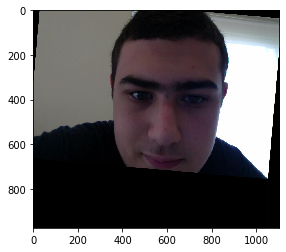

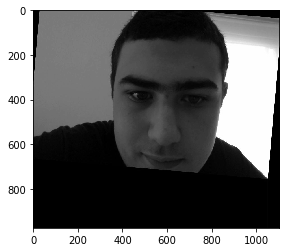

[============================]
21
[[[211 212 206]
  [210 211 205]
  [210 211 205]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[212 213 207]
  [210 211 205]
  [210 211 205]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[213 214 208]
  [211 212 206]
  [210 211 205]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
(667, 668, 3)
<class 'PIL.Image.Image'>
RGB
(668, 667)


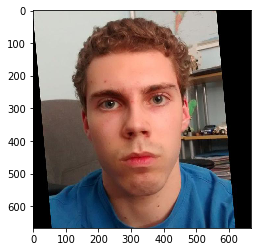

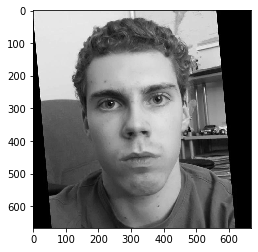

[============================]
42
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
(830, 830, 3)
<class 'PIL.Image.Image'>
RGB
(830, 830)


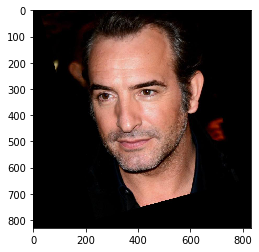

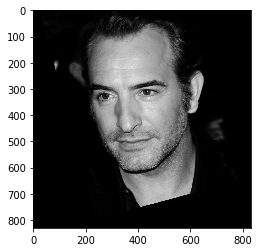

[============================]
50
[[[47 56 95]
  [47 56 95]
  [47 56 95]
  ...
  [44 55 85]
  [44 55 85]
  [44 55 85]]

 [[47 56 95]
  [47 56 95]
  [47 56 95]
  ...
  [44 55 85]
  [44 55 85]
  [44 55 85]]

 [[47 56 95]
  [47 56 95]
  [47 56 95]
  ...
  [44 55 85]
  [44 55 85]
  [44 55 85]]

 ...

 [[37 28 23]
  [37 28 23]
  [37 28 23]
  ...
  [20 21 15]
  [20 21 15]
  [20 21 15]]

 [[37 28 23]
  [37 28 23]
  [37 28 23]
  ...
  [20 21 15]
  [20 21 15]
  [20 21 15]]

 [[37 28 23]
  [37 28 23]
  [37 28 23]
  ...
  [20 21 15]
  [20 21 15]
  [20 21 15]]]
(1811, 1811, 3)
<class 'PIL.Image.Image'>
RGB
(1811, 1811)


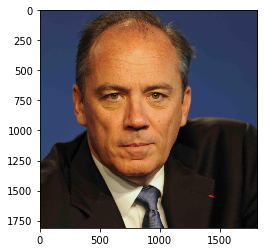

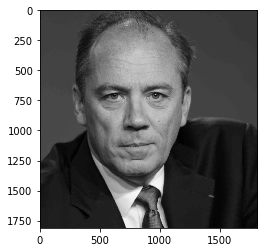

[============================]
64
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 81  37  12]
  [ 81  37  12]
  [ 82  38  13]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 81  37  12]
  [ 81  37  12]
  [ 82  38  13]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 81  37  12]
  [ 81  37  12]
  [ 82  38  13]]

 ...

 [[ 64  90  79]
  [ 62  88  77]
  [ 62  88  77]
  ...
  [  0   3   0]
  [  0   3   0]
  [  0   1   0]]

 [[ 69  95  84]
  [ 70  96  85]
  [ 71  97  86]
  ...
  [  0   2   0]
  [  0   3   0]
  [  0   2   0]]

 [[ 72  98  87]
  [ 75 101  90]
  [ 77 103  92]
  ...
  [  0   2   0]
  [  0   4   0]
  [  1   3   0]]]
(406, 406, 3)
<class 'PIL.Image.Image'>
RGB
(406, 406)


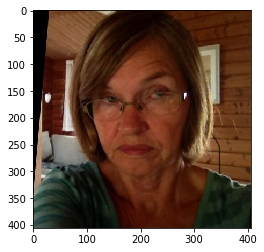

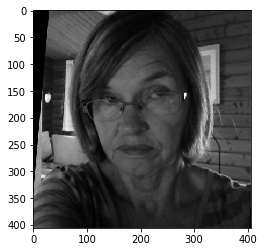

[============================]
67
[[[193 189 186]
  [189 188 184]
  [188 187 183]
  ...
  [137 128 111]
  [137 128 111]
  [138 129 112]]

 [[192 188 185]
  [188 187 183]
  [187 186 182]
  ...
  [137 128 111]
  [137 128 111]
  [138 129 112]]

 [[191 187 184]
  [188 187 183]
  [187 186 182]
  ...
  [137 128 111]
  [137 128 111]
  [138 129 112]]

 ...

 [[ 15  15  15]
  [ 15  15  15]
  [ 14  14  14]
  ...
  [162 161 157]
  [161 160 156]
  [161 160 156]]

 [[ 15  15  15]
  [ 15  15  15]
  [ 14  14  14]
  ...
  [162 161 157]
  [161 160 156]
  [161 160 156]]

 [[ 15  15  15]
  [ 14  14  14]
  [ 12  12  12]
  ...
  [161 160 156]
  [160 159 155]
  [162 161 157]]]
(105, 105, 3)
<class 'PIL.Image.Image'>
RGB
(105, 105)


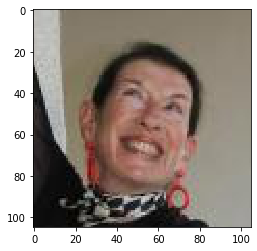

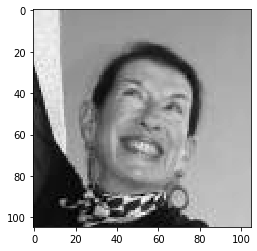

[============================]
38
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
(573, 536, 3)
<class 'PIL.Image.Image'>
RGB
(536, 573)


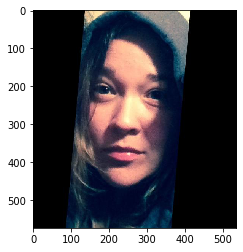

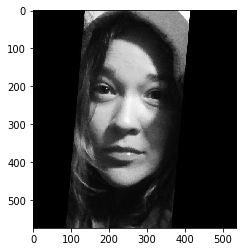

[============================]
34
[[[173 175 174]
  [172 174 173]
  [172 174 173]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[171 173 172]
  [170 172 171]
  [170 172 171]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[171 173 172]
  [170 172 171]
  [170 172 171]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
(1726, 1726, 3)
<class 'PIL.Image.Image'>
RGB
(1726, 1726)


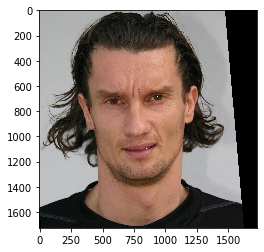

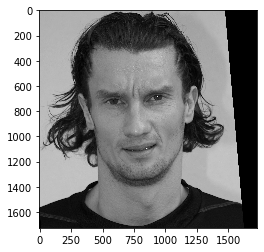

[============================]
32
[[[196 198 197]
  [195 197 196]
  [193 195 194]
  ...
  [151 155 156]
  [152 156 157]
  [153 157 158]]

 [[197 199 198]
  [196 198 197]
  [195 197 196]
  ...
  [154 158 159]
  [154 158 159]
  [155 159 160]]

 [[198 200 199]
  [197 199 198]
  [196 198 197]
  ...
  [151 155 156]
  [151 155 156]
  [152 156 157]]

 ...

 [[192 193 195]
  [192 193 195]
  [191 192 194]
  ...
  [199 203 204]
  [226 230 231]
  [202 206 207]]

 [[192 193 195]
  [192 193 195]
  [191 192 194]
  ...
  [190 194 195]
  [218 222 223]
  [195 199 200]]

 [[192 193 195]
  [192 193 195]
  [191 192 194]
  ...
  [199 203 204]
  [224 228 229]
  [197 201 202]]]
(411, 411, 3)
<class 'PIL.Image.Image'>
RGB
(411, 411)


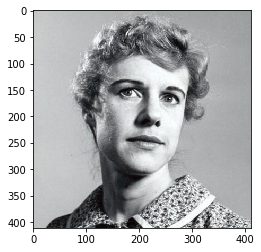

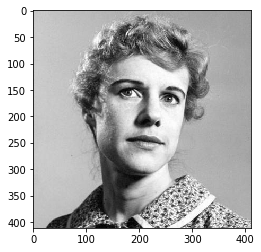

[============================]
30
[[[187 182 179]
  [197 192 189]
  [206 201 198]
  ...
  [ 98  90 103]
  [103  95 108]
  [103  95 108]]

 [[190 185 182]
  [198 193 190]
  [204 199 196]
  ...
  [105  97 110]
  [105  97 110]
  [105  97 110]]

 [[195 190 187]
  [199 194 191]
  [203 198 195]
  ...
  [111 103 116]
  [108 100 113]
  [108 100 113]]

 ...

 [[100  94  98]
  [104  98 102]
  [103  97 101]
  ...
  [116  98  98]
  [106  88  88]
  [101  83  83]]

 [[ 99  93  97]
  [101  95  99]
  [ 98  92  96]
  ...
  [114  96  96]
  [106  88  88]
  [101  83  83]]

 [[103  97 101]
  [101  95  99]
  [ 95  89  93]
  ...
  [113  95  95]
  [106  88  88]
  [101  83  83]]]
(299, 298, 3)
<class 'PIL.Image.Image'>
RGB
(298, 299)


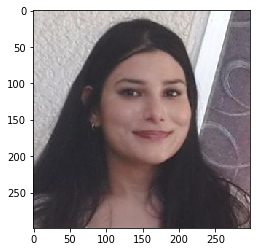

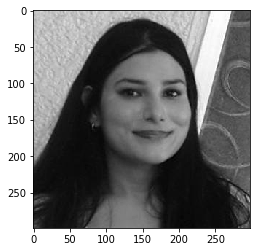

[============================]
6
[[[ 35  33  12]
  [ 31  28   9]
  [ 24  22   7]
  ...
  [ 55  39  49]
  [ 56  43  50]
  [ 43  36  30]]

 [[ 35  32  13]
  [ 31  28  11]
  [ 24  22   7]
  ...
  [ 52  37  42]
  [ 50  38  42]
  [ 41  32  27]]

 [[ 36  33  14]
  [ 32  29  12]
  [ 25  23  10]
  ...
  [ 48  33  36]
  [ 43  31  31]
  [ 35  24  22]]

 ...

 [[  4   9  13]
  [  4   9  13]
  [  5  10  14]
  ...
  [110 132 182]
  [ 91 109 157]
  [ 70  76 108]]

 [[  4   9  13]
  [  4   9  13]
  [  5  10  14]
  ...
  [108 131 181]
  [ 87 108 155]
  [ 80  86 120]]

 [[  4   9  13]
  [  4   9  13]
  [  3   8  12]
  ...
  [112 141 201]
  [ 93 118 174]
  [ 81  93 135]]]
(241, 241, 3)
<class 'PIL.Image.Image'>
RGB
(241, 241)


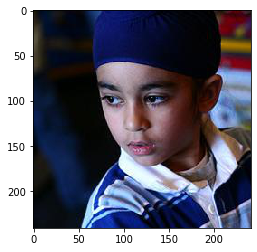

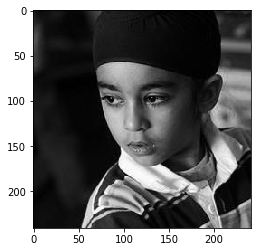

[============================]


In [ ]:
for i, row in df_sample.iterrows():
    path = dir+row['file_name']
    #print(image)
    age = row['real_age']
    print(age)
    image = Image.open(path)
    data = asarray(image)
    print(data)
    # summarize shape
    print(data.shape)
    # create Pillow image
    image2 = Image.fromarray(data)
    print(type(image2))
    # summarize image details
    print(image2.mode)
    print(image2.size)
    plt.imshow(image)
    plt.show()
    grey = np.array(Image.open(path).convert('L'))
    plt.imshow(grey, cmap="gray")
    plt.show()
    
    print("[============================]")

## Analysis

it looks like the pre-processing done for this set included turning images to center the face evidenced by the gaps on the sides of some images that appear to be turned. My guess is that this will help make the model more accurate as it will be predicting based on a more consistent set of feature patterns, allowing it to capture features sets of the faces of people in different age groups to a better effect.

In [ ]:
def load_train(path):
    train_datagen  = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale = 1/255)

    train_datagen_flow  = train_datagen.flow_from_directory(
    path,
    target_size=(150, 150),
    batch_size=16,
    class_mode='sparse',
    seed=54321)

    return train_datagen_flow

def load_test(path):
    test_datagen  = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale = 1/255)

    test_datagen_flow  = train_datagen.flow_from_directory(
    path,
    target_size=(150, 150),
    batch_size=16,
    class_mode='sparse',
    seed=54321)
    
    return test_datagen_flow

def create_model(input_shape=(150, 150, 3)):
    backbone = ResNet50(input_shape=(150, 150, 3),
                        weights='imagenet', 
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(12, activation='softmax'))
    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=4, steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data) 
    model.fit(train_data,
          validation_data=test_data,
          batch_size=batch_size,
          epochs=epochs,
          steps_per_epoch=steps_per_epoch,
         validation_steps=validation_steps,
        verbose=2)

    return model 